In [ ]:
!unzip road_signs.zip 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('road_signs/datasets/train/',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset = train.flow_from_directory('road_signs/datasets/validation/',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 65 images belonging to 4 classes.
Found 65 images belonging to 4 classes.


In [ ]:
train_dataset.class_indices

{'children_crossing': 0, 'fifty': 1, 'no_parking': 2, 'stop': 3}

MODEL DESIGNING


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D  # help in convultion img
from keras.layers import MaxPooling2D, Flatten, Dense # dense layers are hidden layers

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)))   # 16 feature detectors , ech feature detector will be 5,5 size
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))   # 32 feature detectors , ech feature detector will be 5,5 size
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))   # 64 feature detectors , ech feature detector will be 5,5 size
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(260,activation = 'relu'))  # 512 neuron in hidden layer

model.add(Dense(4,activation='softmax'))  # output layer. return 0 or 1 or 2 

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,epochs=16,steps_per_epoch=20,validation_data=validation_dataset, validation_steps =20,verbose=1)

Epoch 1/16
20/20 [==============================] - 21s 332ms/step - loss: 2.4228 - accuracy: 0.2169 - val_loss: 1.3309 - val_accuracy: 0.7167
Epoch 2/16
20/20 [==============================] - 6s 296ms/step - loss: 1.2032 - accuracy: 0.5897 - val_loss: 0.6261 - val_accuracy: 0.8136
Epoch 3/16
20/20 [==============================] - 6s 291ms/step - loss: 0.6995 - accuracy: 0.7931 - val_loss: 0.2836 - val_accuracy: 0.9492
Epoch 4/16
20/20 [==============================] - 6s 297ms/step - loss: 0.4130 - accuracy: 0.8280 - val_loss: 0.2119 - val_accuracy: 0.9153
Epoch 5/16
20/20 [==============================] - 6s 299ms/step - loss: 0.3155 - accuracy: 0.9521 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 6/16
20/20 [==============================] - 6s 295ms/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.0339 - val_accuracy: 0.9661
Epoch 7/16
20/20 [==============================] - 6s 295ms/step - loss: 0.2003 - accuracy: 0.8837 - val_loss: 0.0471 - val_accuracy: 0.9831
Epoch

In [ ]:
model.save('road_signs.h5')

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

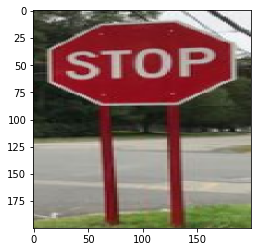

array([[0., 0., 0., 1.]], dtype=float32)

In [ ]:
img = load_img('road_signs/datasets/testing/5.jpg',target_size=(200,200))
img = load_img('11.png',target_size=(200,200))
plt.imshow(img)
plt.show()
XX = img_to_array(img)
XX = np.expand_dims(XX,axis=0)
images = np.vstack([XX])
val = model.predict(XX)
val

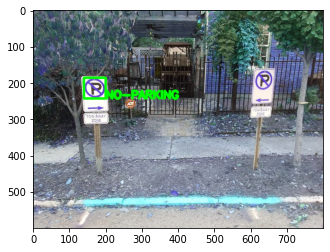

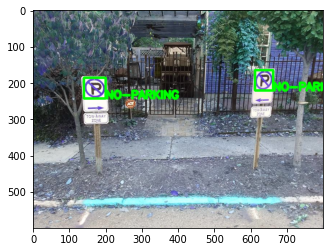

In [29]:
frame = cv2.imread('2.jpg')
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

red_lower = np.array([136,87,111],np.uint8)
red_upper = np.array([180,255,255],np.uint8)

red_mask = cv2.inRange(hsv_frame,red_lower,red_upper)
kernal = np.ones((5,5),"uint8")

red_mask = cv2.dilate(red_mask,kernal)
res_red = cv2.bitwise_and(frame,frame,mask=red_mask)

contours , _ = cv2.findContours(red_mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

s = 0

cnt = 0

for _,cont in enumerate(contours):
    area = cv2.contourArea(cont)
    s = s+ area
    cnt = cnt + 1

avg = s/cnt
#print(s,cnt)
#print(avg)
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1

for i,contour in enumerate(contours):
    area = cv2.contourArea(contour)
    #print(area,len(contour))
    if area > avg and len(contour) >50:
        x,y,w,h = cv2.boundingRect(contour)
        frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),5)
        section = frame[y:y+h,x:x+w]
        #cv2.putText(frame, 'OpenCV', (x+w,y+h), font, fontScale, (0,255,2), 3, cv2.LINE_AA)
        #plt.imshow(frame)
        #plt.show()
        cv2.imwrite("section.jpg",section)
        #section = cv2.resize(section,(200,200),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
        img = load_img('section.jpg',target_size=(200,200))
        #plt.imshow(img)
        #plt.show()
        XX = img_to_array(img)
        XX = np.expand_dims(XX,axis=0)
        images = np.vstack([XX])
        val = model.predict(XX)
        #print(val)
        if(val[0][0]==1):
          cv2.putText(frame, 'CHILD CROSSING', (x+w,y+h), font, fontScale, (0,255,2), 5, cv2.LINE_AA)
          plt.imshow(frame)
          plt.show()
        elif val[0][1] == 1:
          cv2.putText(frame, '50-SIGN', (x+w,y+h), font, fontScale, (0,255,2), 5, cv2.LINE_AA)
          plt.imshow(frame)
          plt.show()
        elif val[0][2] == 1:
          cv2.putText(frame, 'NO-PARKING', (x+w,y+h), font, fontScale, (0,255,2), 5, cv2.LINE_AA)
          plt.imshow(frame)
          plt.show()
        elif val[0][3] == 1:
          cv2.putText(frame, 'STOP', (x+w,y+h), font, fontScale, (0,255,2), 5, cv2.LINE_AA)
          plt.imshow(frame)
          plt.show()

RECOGNIZING IMAGES 


In [ ]:
if(val[0][0]==1):
  print("Children Crossing sign")
elif val[0][1] == 1:
  print("50 sign detected")
elif val[0][2] == 1:
  print("No Parking sign detected")
elif val[0][3] == 1:
  print("STOP sign detected")


50 limit sign


In [ ]:
val[0][2]

0.9988961